In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [84]:
data = pd.read_csv('homeprices.csv')
data.fillna(True, inplace=True)

In [85]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,True,18,610000
3,3600,3.0,30,595000
4,4000,5.0,38,760000
5,4100,6.0,48,810000
6,5454,4.0,55,253453
7,4235,5.0,36,5235345


In [86]:
X = data.drop('price', axis=1)
y = data['price']


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [89]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 19753839497000.27


In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [92]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)


In [93]:
y_pred_nn = model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print('Neural Network Mean Squared Error:',mse_nn)

1/1 [==============================] - 0s 99ms/step
Neural Network Mean Squared Error: 487657531510.61255


In [96]:
import matplotlib.pyplot as plt  

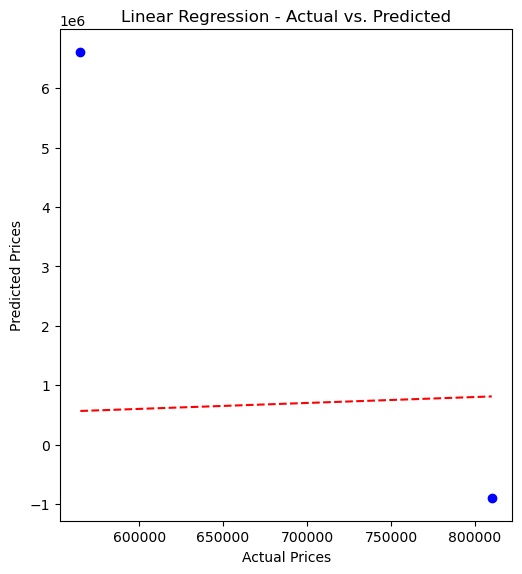

In [101]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()